In [1]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

import statsmodels.api as sm

import dataframe_image as dfi

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
import os

try:
    os.mkdir("../PLOTS/NF_SUBAVG_EX")
except:
    print("NF_SUBAVG_EX dir exists.")

    7
swivel = 0

#F ORDER
#swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 22, 13, 19, 11, 18, 21, 17]
swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 13, 19, 11, 18, 21, 17]

# NF ORDER
#swivel_order = [22, 2, 6, 1, 3, 0, 4, 8, 7, 15, 5, 14, 16, 9, 12, 18, 20, 17, 13, 10, 19, 21, 11]
#swivel_order = [2, 6, 1, 3, 0, 4, 8, 7, 15, 5, 14, 16, 9, 12, 18, 20, 17, 13, 10, 19, 21, 11]

desired_dir_name = "NF_SUBAVG_EX"
desired_file_prefix = "NF_E" 

normalize_data=True

by_year = 1
lnconvert=False
 

NF_SUBAVG_EX dir exists.


# FUNCTIONS

In [3]:
def func(x, m, c):
    return (m * x) + c

In [4]:
def color_corr_green(val):
  color = 'green' if val > 0.8 else 'black'
  return 'color: %s' % color

In [5]:
def gen_boxplot():

 case_list = []

 # Create list of data cases
 #
 for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

 print(case_list)

 # Handle one case at a time
 #
 for case in case_list:
        
    #print("case = ",case)
    
    pd_df = pd.DataFrame()
    sel_y = []
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            name = name[0:5] + name[8:]
            #print("8 ",name)
            
            df = pd.DataFrame()
            df[name] = sel_y
            
            #Q1 = df[name].quantile(0.25)
            #Q3 = df[name].quantile(0.75)
            #IQR = Q3 - Q1    #IQR is interquartile range. 

            #filter = (df[name] >= Q1 - 1.5 * IQR) & (df[name] <= Q3 + 1.5 *IQR)
            #print(filter)
            #df = df.loc[filter]
            
            q = df[name].quantile(0.80)
            df = df[df[name] < q]
            
            pd_df = pd.concat([pd_df,df],axis=1)
        
            #print(pd_df)

    # Get occupation
    for code in soc_new_code:
        #print(code[0][0:2])
        if (code[0][0:2].find(case[0:2]) >= 0):
            #print(code[0],code[1])
            ocup = str(code[0]) + " " + str(code[1])
            
    #print(ocup)

    title = desired_file_prefix + " " + ocup + " boxplot " + str(case[3:])
    plt.figure(title,figsize=(10, 10))
    plt.title(title)

    #plt.ylim(0.0, 3e-6)

    pd_df.boxplot()
    plt.xticks(rotation = 90)
    plt.tight_layout()  

    save_title = "../PLOTS/" + desired_file_output + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    
    #print("HERE")
    #print(df[df['YEAR'].str.contains(name)])
    
    ## ########################## correlations ######################
    
    title = title + "_pearson_corr"

    df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

    df = pd_df.corr(method='pearson')
 
    df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
    save_file = "../PLOTS/" + desired_file_output + title + ".png"
    dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

    save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
    df_corr.to_excel(save_file)

    display(df_styled)        

# ALL CORRELATIONS

In [6]:
# Generate all correlations
#
def gen_corr():

  pd_df = pd.DataFrame()
  sel_y = []
    
  case_list = []

  # Create list of data cases
  #
  for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

  print(case_list)

  # Handle one case at a time
  #
  for case in case_list:
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            
            temp_pd_df = pd.DataFrame()
            temp_pd_df[name] = sel_y
            pd_df = pd.concat([pd_df,temp_pd_df],axis=1)
        
            #print(pd_df)

            # Get occupation
            for code in soc_new_code:
                #print(code[0][0:2])
                if (code[0][0:2].find(case[0:2]) >= 0):
                    #print(code[0],code[1])
                    ocup = str(code[0]) + " " + str(code[1])
            
  #print(ocup)

  title = desired_file_prefix + ocup +" ALL boxplot " + str(case[3:])
  plt.figure(title,figsize=(10, 10))
  plt.title(title)

  #plt.ylim(0.0, 3e-6)

  pd_df.boxplot()
  plt.xticks(rotation = 90)
  plt.tight_layout()  

  save_title = "../PLOTS/" + desired_file_output + title + ".png"
  save_title = save_title.replace(",","")
  save_title = save_title.replace(" ","_")
  plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
  plt.show()
    
  #print("HERE")
  #print(df[df['YEAR'].str.contains(name)])
    
  ## ########################## correlations ######################
    
  title = title + "_pearson_corr"

  df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

  df = pd_df.corr(method='pearson')
 
  df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
  save_file = "../PLOTS/" + desired_file_output + title + ".png"
  dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

  save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
  df_corr.to_excel(save_file)

  display(df_styled)        



# COLLATE THE DATA

In [7]:
lastfound = ""
pcov      = []


no_genericDB_data_dict = {}


ocovper   = []
ocov      = []
lines     = []

global_y_soc1 = []

for ocup_sel in range(1,24):
    
    print("########################################## NEW OCCUPATION ###############################################")
    print("")
    
    for year in range(0,8): 

        print("########################################## NEW YEAR ###############################################")
        
        desired_file_output = "./" + desired_dir_name + "/" + desired_file_prefix + "_" + str(2011+year) + "_"     
        
        %run ./analysis-code-subcat3-avg.ipynb

        #print(global_y_soc1)
    

########################################## NEW OCCUPATION ###############################################

########################################## NEW YEAR ###############################################
SOC_all.csv
global_y_soc1 found.
global_soc1_empty not found....defining
NF_E7X_Overex_all.csv
NF_E1X_In_UnIn_Animal_all.csv
NF_E2X_Transportion_all.csv
NF_E6X_Contact_all.csv
NF_E4X_Falls_Slip_Trip_all.csv
NF_E3X_Fire_Explosion_all.csv
NF_E5X_Exposure_all.csv
NF_EXX_All_other_all.csv
dict_keys(['NF_E7X_Overex', 'NF_E1X_In_UnIn_Animal', 'NF_E2X_Transportion', 'NF_E6X_Contact', 'NF_E4X_Falls_Slip_Trip', 'NF_E3X_Fire_Explosion', 'NF_E5X_Exposure', 'NF_EXX_All_other'])
code_found: 11-0000:Management Occupations
*gt(adding): NF_E7X_Overex_112000
NF_E7X_Overex
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
*gt(adding): NF_E7X_Overex_113000
NF_E7X_Overex
########## NEED TO EVAL ##################
########## NEED TO EVAL ##################
*gt(adding)

In [8]:
#for i in range(0,200):      #len(global_y_soc1)):
#    print(global_y_soc1[i])

# SAMPLE STRUCTURE

In [9]:
for i in range(0,10):      #len(global_y_soc1)):
    print(global_y_soc1[i])

['2011_NF_E7X_Overex_111000-Management Occupations', [7.337239226852105e-05, 4.3804413294639436e-06, 4.3804413294639436e-06, 6.899195093905712e-05, 6.899195093905712e-05]]
['2011_NF_E7X_Overex_112000-Management Occupations', [1.7521765317855774e-05, 1.6426654985489787e-05, 3.2853309970979575e-06, 1.314132398839183e-05]]
['2011_NF_E7X_Overex_113000-Management Occupations', [8.925149208782785e-05, 2.1354651481136723e-05, 2.1354651481136723e-05, 6.570661994195915e-06, 6.570661994195915e-06, 3.8328861632809504e-05, 3.8328861632809504e-05, 4.927996495646936e-06, 4.927996495646936e-06, 3.2853309970979575e-06, 3.2853309970979575e-06, 8.760882658927887e-06, 8.760882658927887e-06]]
['2011_NF_E7X_Overex_113110-Management Occupations', [1.0951103323659859e-06, 1.0951103323659859e-06, 4.3804413294639436e-06, 4.3804413294639436e-06, 1.0951103323659859e-06, 1.0951103323659859e-06]]
['2011_NF_E7X_Overex_119000-Management Occupations', [0.0002650167004325686, 3.2853309970979575e-06, 3.2853309970979575

In [10]:
print(global_y_soc1[-1])

['2018_NO DATA FOUND-Military Specific Occupations', [0]]


In [11]:
code_list = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']


In [12]:
print( str(global_y_soc1[0][0]).split("_")[1:3]  )

ca = global_y_soc1[0][0].split("_")[1:3]
print(ca[0] + "_" + ca[1])

['NF', 'E7X']
NF_E7X


['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
../PLOTS/./NF_SUBAVG_EX/NF_E_2018_110000_Management_Occupations_time_plots_.png


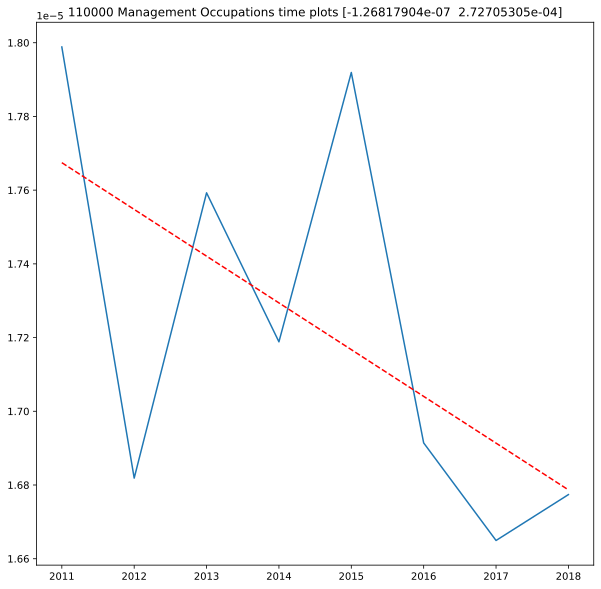

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_130000_Business_and_Financial_Operations_Occupations_time_plots_.png


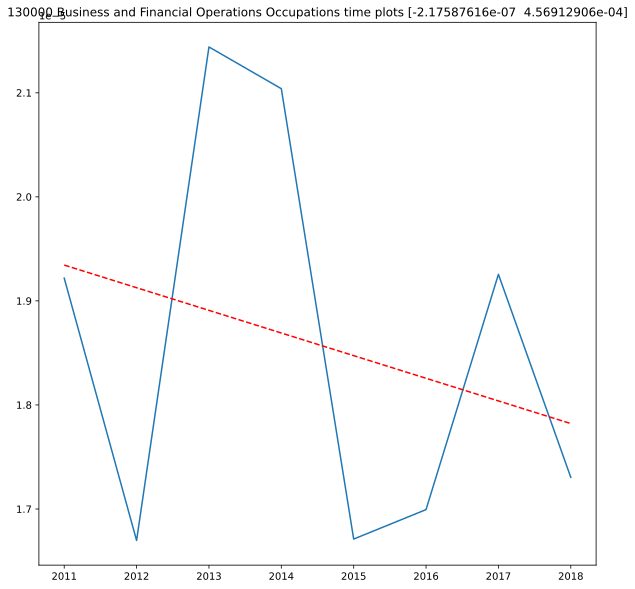

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_150000_Computer_and_Mathematical_Occupations_time_plots_.png


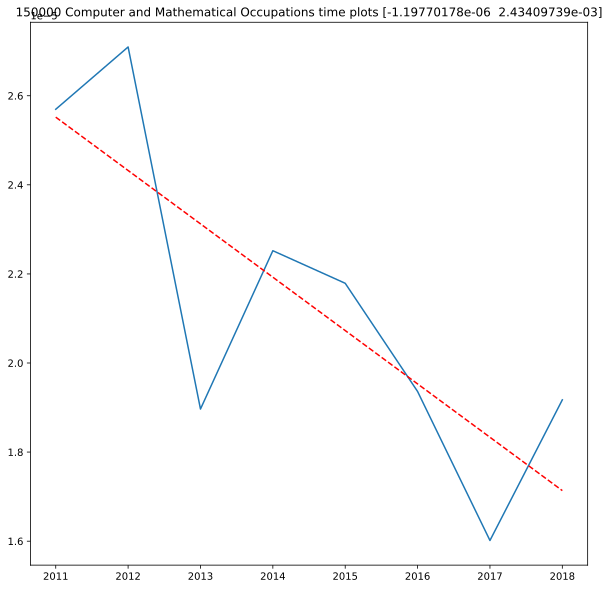

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_170000_Architecture_and_Engineering_Occupations_time_plots_.png


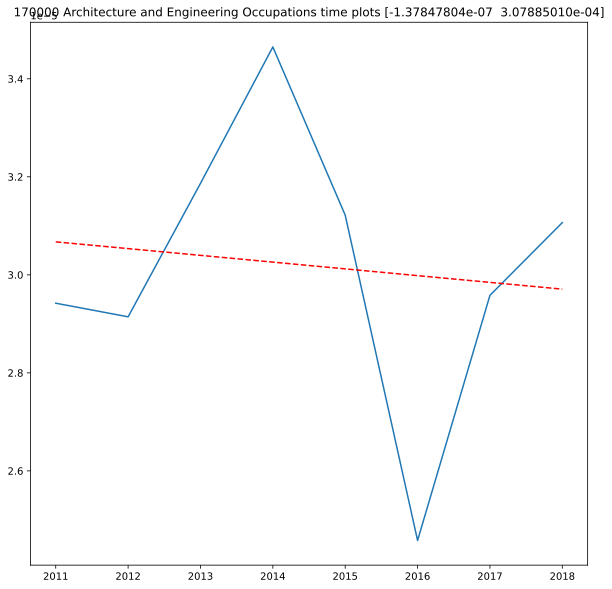

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_190000_Life_Physical_and_Social_Science_Occupations_time_plots_.png


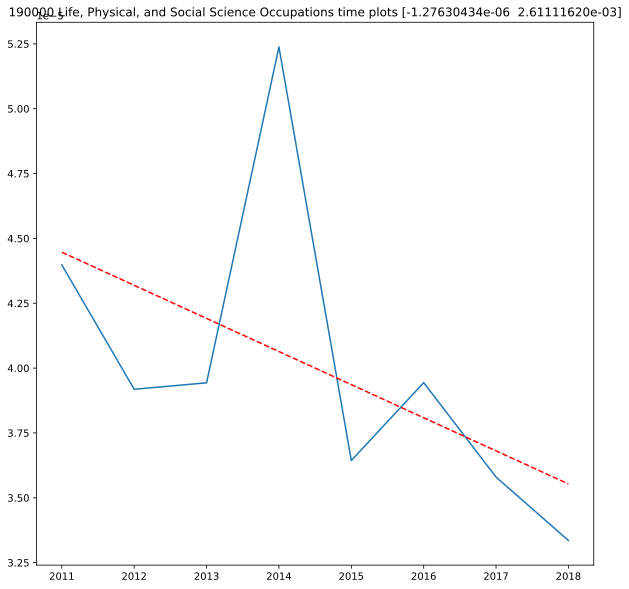

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_210000_Community_and_Social_Service_Occupations_time_plots_.png


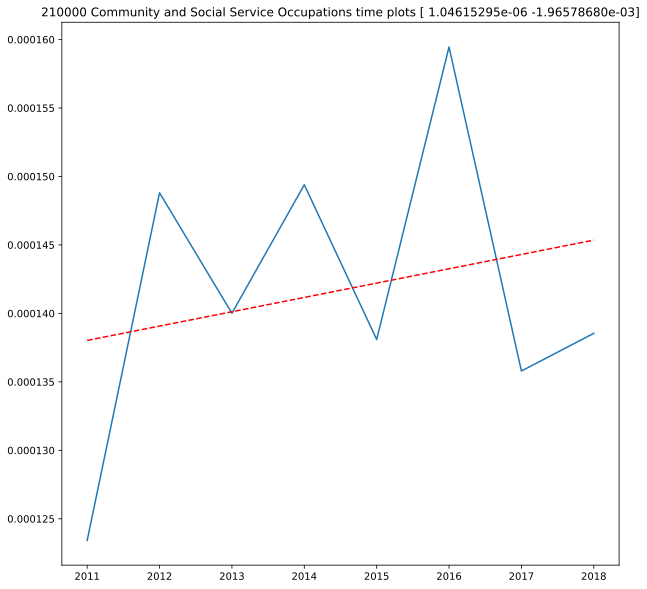

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_230000_Legal_Occupations_time_plots_.png


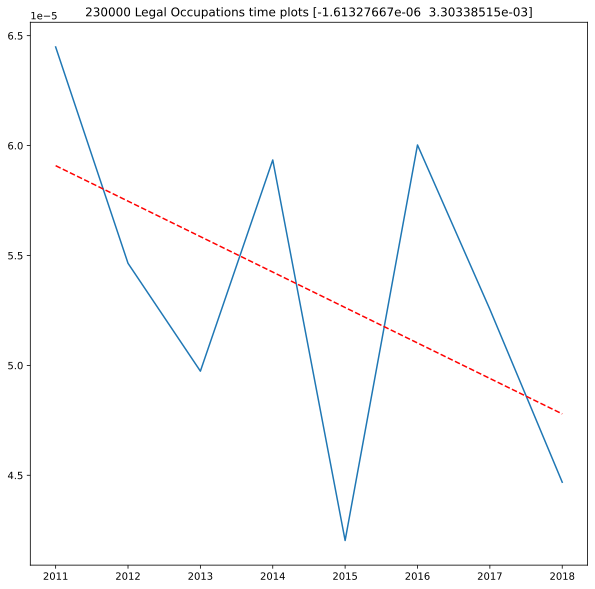

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_250000_Educational_Instruction_and_Library_Occupations_time_plots_.png


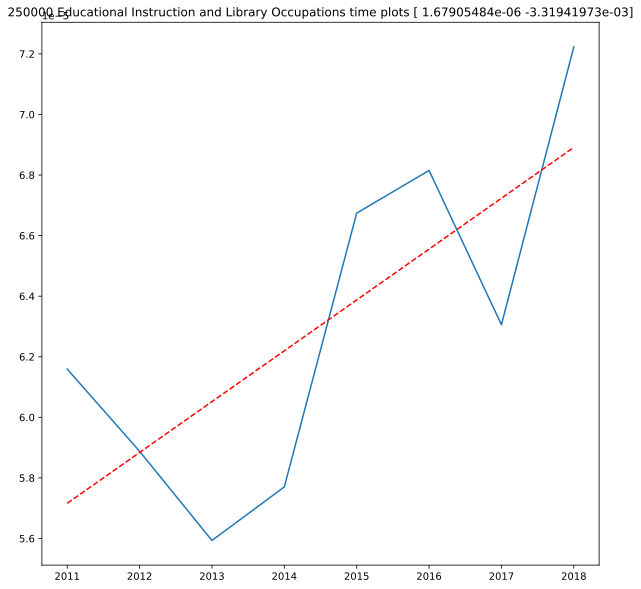

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_270000_Arts_Design_Entertainment_Sports_and_Media_Occupations_time_plots_.png


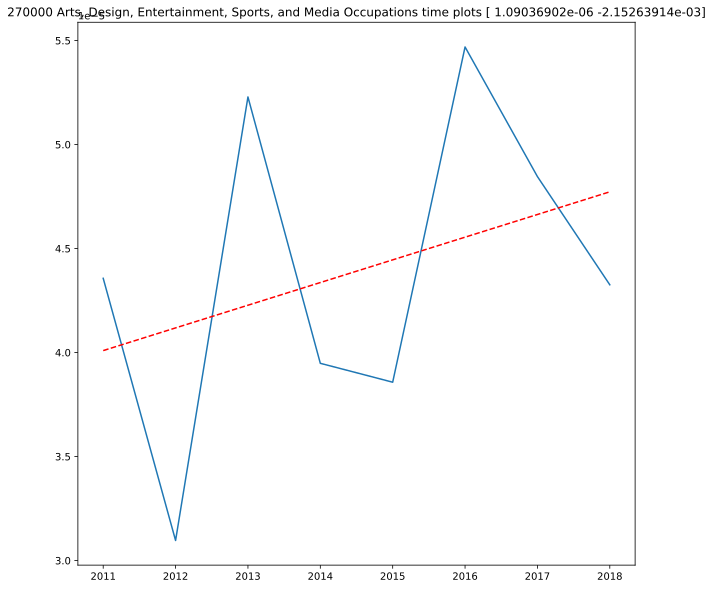

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_290000_Healthcare_Practitioners_and_Technical_Occupations_time_plots_.png


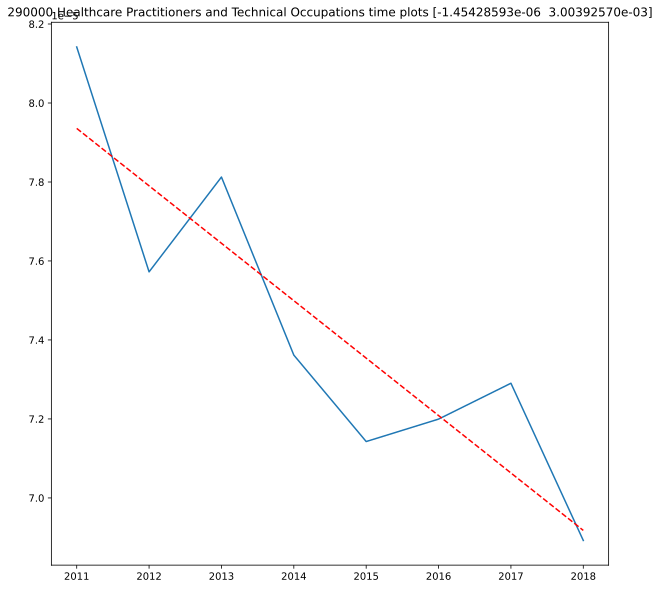

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_310000_Healthcare_Support_Occupations_time_plots_.png


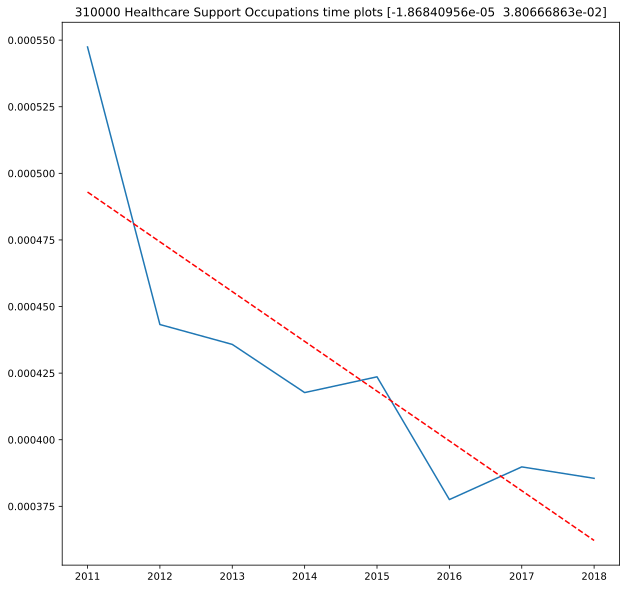

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_330000_Protective_Service_Occupations_time_plots_.png


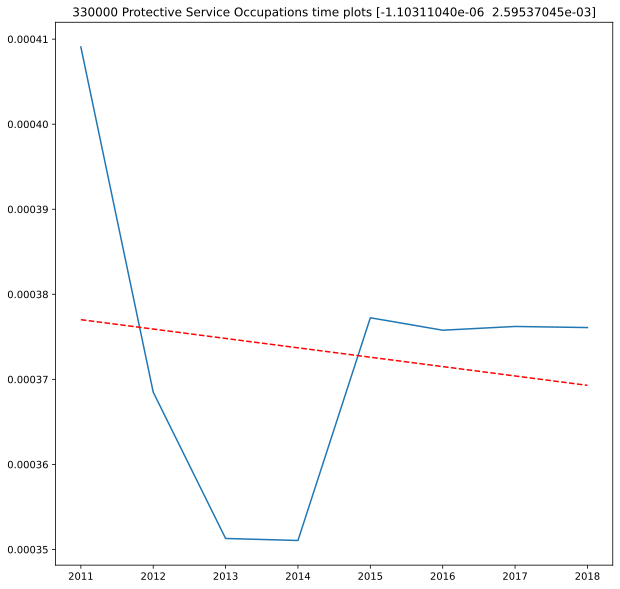

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_350000_Food_Preparation_and_Serving_Related_Occupations_time_plots_.png


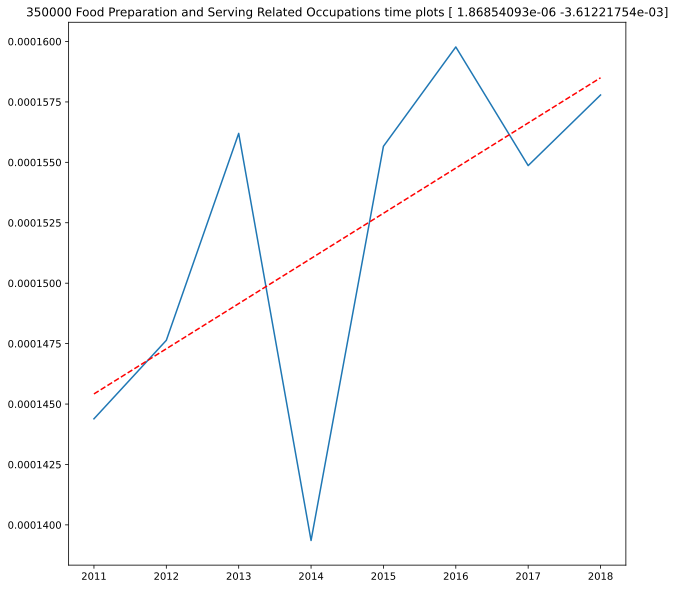

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_370000_Building_and_Grounds_Cleaning_and_Maintenance_Occupations_time_plots_.png


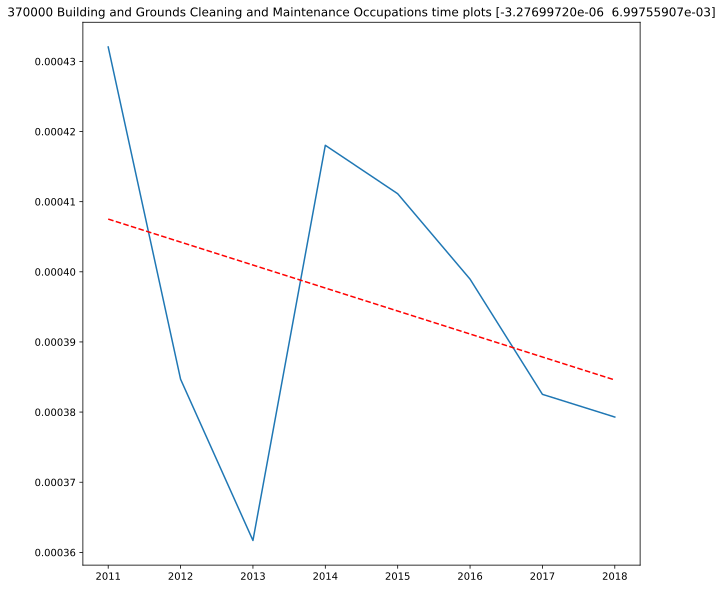

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_390000_Personal_Care_and_Service_Occupations_time_plots_.png


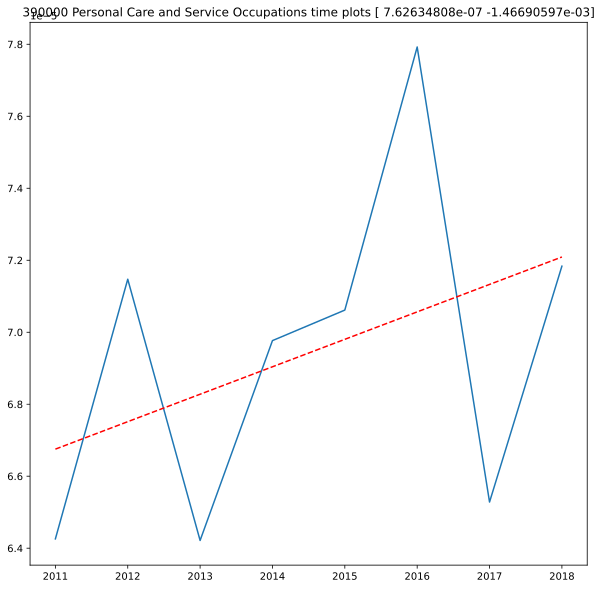

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_410000_Sales_and_Related_Occupations_time_plots_.png


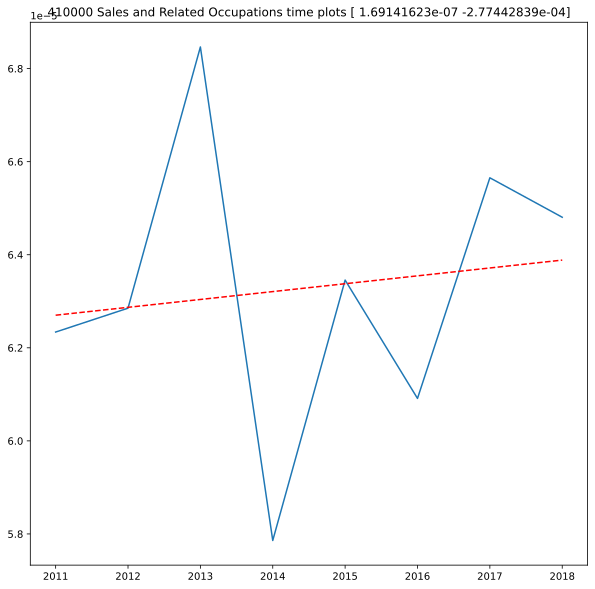

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_430000_Office_and_Administrative_Support_Occupations_time_plots_.png


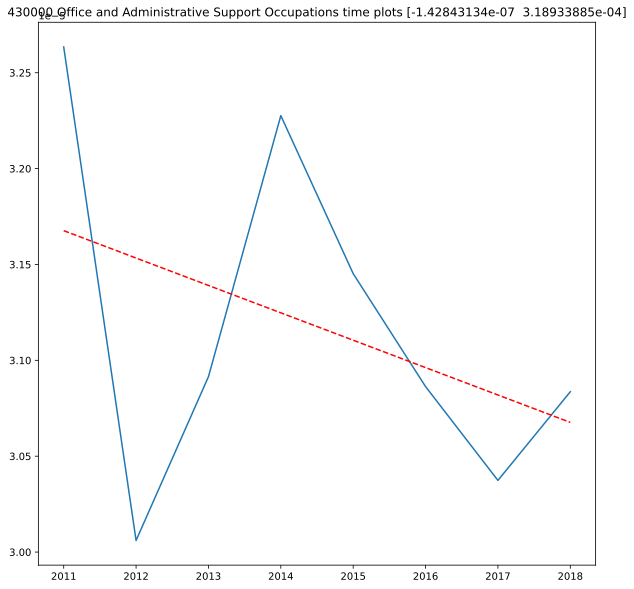

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_450000_Farming_Fishing_and_Forestry_Occupations_time_plots_.png


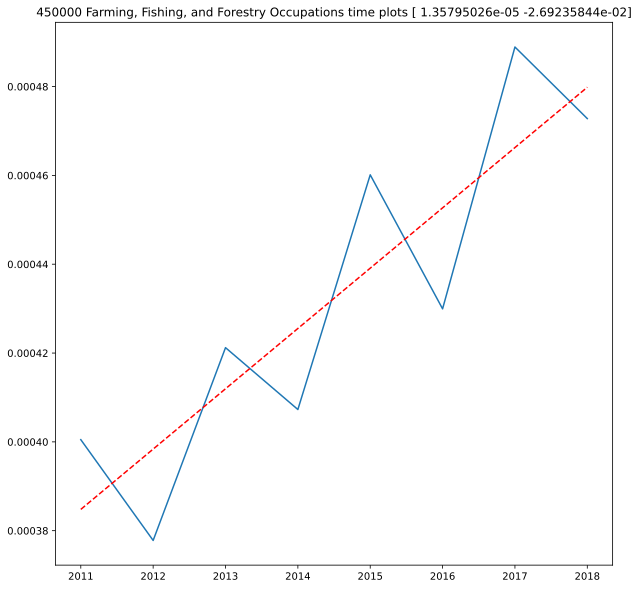

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_470000_Construction_and_Extraction_Occupations_time_plots_.png


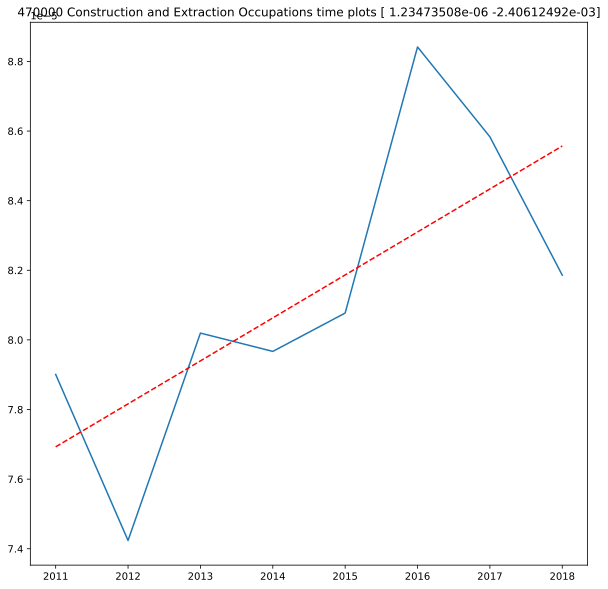

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_490000_Installation_Maintenance_and_Repair_Occupations_time_plots_.png


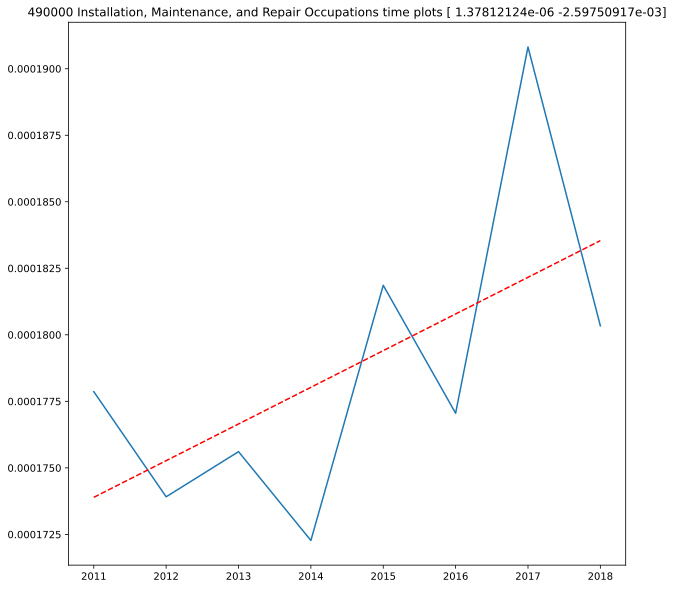

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_510000_Production_Occupations_time_plots_.png


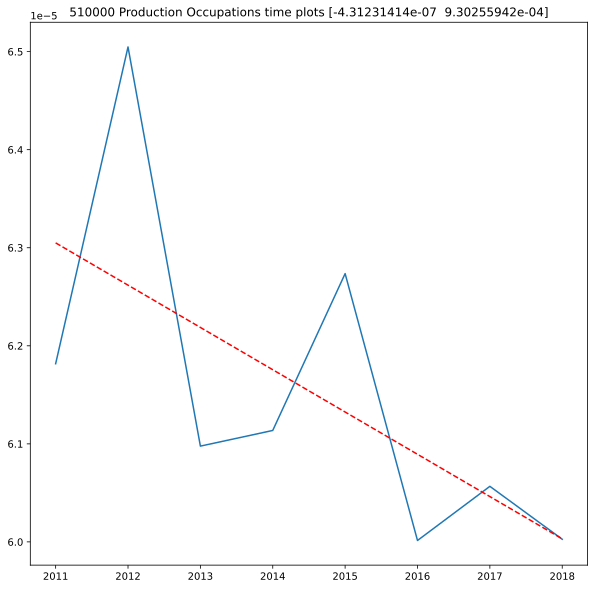

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


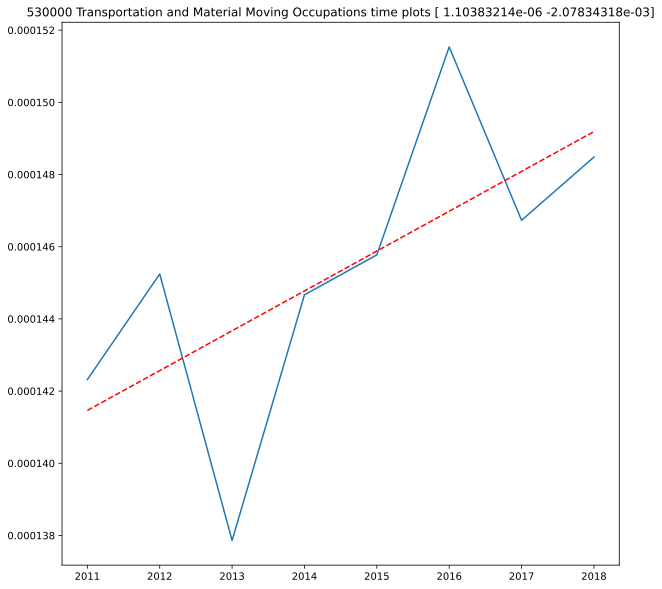

In [13]:
code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

#code_list =  ['_11', '_13' ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        
        if (len(tmp_lst) == 0):
            omean = 0.0
        else:
            omean = np.array(tmp_lst).mean()

        #print(year,occupation,omean)
        #print(" ")
 
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
 
    lines.append([use_case, popt])        
        
    #display(popt, pcov)
    
    for ri in range(0+2011,len(x)+2011):
        r.append(func(ri, *popt))
        #print(ri,r)
        
    plt.figure(figsize=(10, 10))
    
    plt.plot(x,y)
    plt.plot(x,r, 'r--')
    
    title = " time plots "
    
    plt.title(use_case + title + str(popt))    
    
    save_title = "../PLOTS/" + desired_file_output + use_case + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    print(save_title)
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    #plt.close()


In [14]:
for i in range(0,len(lines)):
    print(" y = {0: 1.8f} x + {1: 1.8f}  : {2} ".format(lines[i][1][0], lines[i][1][1], lines[i][0]))
    

 y = -0.00000013 x +  0.00027271  : 110000 Management Occupations 
 y = -0.00000022 x +  0.00045691  : 130000 Business and Financial Operations Occupations 
 y = -0.00000120 x +  0.00243410  : 150000 Computer and Mathematical Occupations 
 y = -0.00000014 x +  0.00030789  : 170000 Architecture and Engineering Occupations 
 y = -0.00000128 x +  0.00261112  : 190000 Life, Physical, and Social Science Occupations 
 y =  0.00000105 x + -0.00196579  : 210000 Community and Social Service Occupations 
 y = -0.00000161 x +  0.00330339  : 230000 Legal Occupations 
 y =  0.00000168 x + -0.00331942  : 250000 Educational Instruction and Library Occupations 
 y =  0.00000109 x + -0.00215264  : 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
 y = -0.00000145 x +  0.00300393  : 290000 Healthcare Practitioners and Technical Occupations 
 y = -0.00001868 x +  0.03806669  : 310000 Healthcare Support Occupations 
 y = -0.00000110 x +  0.00259537  : 330000 Protective Service Occupations

# CALC COV 

In [15]:
cov_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)

print(code_list)

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']


In [16]:
# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]

for i in range(0,len(code_list)):
       
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0):
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0

        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        

    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    
    if (math.isnan(omean)):
        ocov = 0.0
    else:
        ostd  = np.array(y).std()
        ocov  = ostd/omean
        
    #ocov.append(str(use_case),ocov)
    print("***",use_case,ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])
    else:
        print("########ERROR#######")
       

*** 110000 Management Occupations 0.02899942615087818
*** 130000 Business and Financial Operations Occupations 0.09751477666010165
*** 150000 Computer and Mathematical Occupations 0.16266836571647142
*** 170000 Architecture and Engineering Occupations 0.08922412001106668
*** 190000 Life, Physical, and Social Science Occupations 0.13831392809573256
*** 210000 Community and Social Service Occupations 0.07145038548635652
*** 230000 Legal Occupations 0.1360687476963715
*** 250000 Educational Instruction and Library Occupations 0.08369389158332585
*** 270000 Arts, Design, Entertainment, Sports, and Media Occupations 0.16566066234161506
*** 290000 Healthcare Practitioners and Technical Occupations 0.05043442238298295
*** 310000 Healthcare Support Occupations 0.11836574892368955
*** 330000 Protective Service Occupations 0.04563935868298501
*** 350000 Food Preparation and Serving Related Occupations 0.04475357446564202
*** 370000 Building and Grounds Cleaning and Maintenance Occupations 0.0549

In [17]:
print(cov_array)

[['110000 Management Occupations', 0.02899942615087818], ['130000 Business and Financial Operations Occupations', 0.09751477666010165], ['150000 Computer and Mathematical Occupations', 0.16266836571647142], ['170000 Architecture and Engineering Occupations', 0.08922412001106668], ['190000 Life, Physical, and Social Science Occupations', 0.13831392809573256], ['210000 Community and Social Service Occupations', 0.07145038548635652], ['230000 Legal Occupations', 0.1360687476963715], ['250000 Educational Instruction and Library Occupations', 0.08369389158332585], ['270000 Arts, Design, Entertainment, Sports, and Media Occupations', 0.16566066234161506], ['290000 Healthcare Practitioners and Technical Occupations', 0.05043442238298295], ['310000 Healthcare Support Occupations', 0.11836574892368955], ['330000 Protective Service Occupations', 0.04563935868298501], ['350000 Food Preparation and Serving Related Occupations', 0.04475357446564202], ['370000 Building and Grounds Cleaning and Maint

In [18]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0255992 	 510000 Production Occupations 
0.0261917 	 530000 Transportation and Material Moving Occupations 
0.0267961 	 430000 Office and Administrative Support Occupations 
0.0289994 	 110000 Management Occupations 
0.0304358 	 490000 Installation, Maintenance, and Repair Occupations 
0.0447536 	 350000 Food Preparation and Serving Related Occupations 
0.0456394 	 330000 Protective Service Occupations 
0.0470430 	 410000 Sales and Related Occupations 
0.0497645 	 470000 Construction and Extraction Occupations 
0.0504344 	 290000 Healthcare Practitioners and Technical Occupations 
0.0549477 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.0633558 	 390000 Personal Care and Service Occupations 
0.0714504 	 210000 Community and Social Service Occupations 
0.0832174 	 450000 Farming, Fishing, and Forestry Occupations 
0.0836939 	 250000 Educational Instruction and Library Occupations 
0.0892241 	 170000 Architecture and Engineering Occupations 
0.0975148 	 130000 Bu

# MEAN

In [19]:
mean_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0):
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0
        
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    #ostd  = np.array(y).std()
    #ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case,omean)
    
    if (omean >= 0):
        mean_array.append([str(use_case),omean])

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
110000 Management Occupations 1.7230637399364185e-05
130000 Business and Financial Operations Occupations 1.8582653148074e-05
150000 Computer and Mathematical Occupations 2.1327150646458735e-05
170000 Architecture and Engineering Occupations 3.0190607658170815e-05
190000 Life, Physical, and Social Science Occupations 4.000110679149127e-05
210000 Community and Social Service Occupations 0.0001416883112860255
230000 Legal Occupations 5.3439301100921934e-05
250000 Educational Instruction and Library Occupations 6.303624523431281e-05
270000 Arts, Design, Entertainment, Sports, and Media Occupations 4.390924471888864e-05
290000 Healthcare Practitioners and Technical Occupations 7.426669157284823e-05
310000 Healthcare Support Occupations 0.00042757583152221515
330000 Protective Service Occupations 0.0003731545589389601
350000 Food Preparat

In [20]:
test_list = mean_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    
    
    
# create sorted order index list
sorted_order = []
for i in range(0,len(test_list)):
    idx = str(test_list[i][0]).split(" ")[0][0:2]
    nidx = int( (int(idx) - 11) / 2 )
    sorted_order.append(nidx)
    
print(sorted_order)

0.0000172 	 110000 Management Occupations 
0.0000186 	 130000 Business and Financial Operations Occupations 
0.0000213 	 150000 Computer and Mathematical Occupations 
0.0000302 	 170000 Architecture and Engineering Occupations 
0.0000312 	 430000 Office and Administrative Support Occupations 
0.0000400 	 190000 Life, Physical, and Social Science Occupations 
0.0000439 	 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0000534 	 230000 Legal Occupations 
0.0000615 	 510000 Production Occupations 
0.0000630 	 250000 Educational Instruction and Library Occupations 
0.0000633 	 410000 Sales and Related Occupations 
0.0000694 	 390000 Personal Care and Service Occupations 
0.0000743 	 290000 Healthcare Practitioners and Technical Occupations 
0.0000812 	 470000 Construction and Extraction Occupations 
0.0001417 	 210000 Community and Social Service Occupations 
0.0001453 	 530000 Transportation and Material Moving Occupations 
0.0001520 	 350000 Food Preparation and Serv

# COV LEVEL 3

In [21]:
code_list = []
soc_level = 3

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-5 + soc_level]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

['_1110', '_1120', '_1130', '_1131', '_1190', '_1191', '_1310', '_1311', '_1320', '_1511', '_1520', '_1710', '_1720', '_1721', '_1730', '_1910', '_1920', '_1930', '_1940', '_2110', '_2120', '_2310', '_2320', '_2510', '_2511', '_2520', '_2530', '_2540', '_2590', '_2710', '_2720', '_2730', '_2740', '_2910', '_2911', '_2920', '_2990', '_3110', '_3120', '_3190', '_3310', '_3320', '_3330', '_3390', '_3510', '_3520', '_3530', '_3590', '_3710', '_3720', '_3730', '_3910', '_3920', '_3930', '_3940', '_3950', '_3960', '_3970', '_3990', '_4110', '_4120', '_4130', '_4140', '_4190', '_4310', '_4320', '_4330', '_4340', '_4341', '_4350', '_4351', '_4360', '_4390', '_4391', '_4510', '_4520', '_4530', '_4540', '_4710', '_4720', '_4721', '_4722', '_4730', '_4740', '_4750', '_4910', '_4920', '_4930', '_4990', '_5110', '_5120', '_5130', '_5140', '_5141', '_5151', '_5160', '_5170', '_5180', '_5190', '_5191', '_5310', '_5320', '_5330', '_5340', '_5350', '_5360', '_5370', '_5371']


In [22]:
cov_array = []

lines     = []

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]

soc_level = 3

for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0):
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0
        
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
                   
    omean = np.array(y).mean()
    ostd  = np.array(y).std()
    ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case, ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])

110000 Management Occupations 0.0983567425646745
110000 Management Occupations 0.20328130543870218
110000 Management Occupations 0.12140131987054885
110000 Management Occupations 0.3279720036806726
110000 Management Occupations 0.09128144977500284
110000 Management Occupations 0.10072900630814542
130000 Business and Financial Operations Occupations 0.1201071217468394
130000 Business and Financial Operations Occupations 0.07606162688685926
130000 Business and Financial Operations Occupations 0.2154532871699245
150000 Computer and Mathematical Occupations 0.13673750430770967
150000 Computer and Mathematical Occupations 0.6313495493809429
170000 Architecture and Engineering Occupations 0.5841958250635048
170000 Architecture and Engineering Occupations 0.248147185597195
170000 Architecture and Engineering Occupations 0.2621393272691218
170000 Architecture and Engineering Occupations 0.086816515273234
190000 Life, Physical, and Social Science Occupations 0.14117173981968936
190000 Life, Phy

In [23]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0277917 	 510000 Production Occupations 
0.0406018 	 290000 Healthcare Practitioners and Technical Occupations 
0.0427068 	 530000 Transportation and Material Moving Occupations 
0.0453752 	 510000 Production Occupations 
0.0459349 	 490000 Installation, Maintenance, and Repair Occupations 
0.0488527 	 410000 Sales and Related Occupations 
0.0517534 	 510000 Production Occupations 
0.0526340 	 350000 Food Preparation and Serving Related Occupations 
0.0556193 	 510000 Production Occupations 
0.0591355 	 510000 Production Occupations 
0.0653698 	 490000 Installation, Maintenance, and Repair Occupations 
0.0656148 	 510000 Production Occupations 
0.0673577 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.0682597 	 210000 Community and Social Service Occupations 
0.0704253 	 410000 Sales and Related Occupations 
0.0716083 	 470000 Construction and Extraction Occupations 
0.0721853 	 390000 Personal Care and Service Occupations 
0.0736032 	 530000 Transportation and 

# VARIANCE ACROSS AGE

In [24]:
def get_case_list(soc_level, desired_case):
    code_list = []

    #soc_level = 1
    #desired_case = "16to19"

    global global_y_soc1
    
    for i in range(0,len(global_y_soc1)):
        ucase = str(global_y_soc1[i][0]).split('-')[0]
        #print(ucase)
        
        if (ucase.find("NO DATA FOUND") < 0):
            ocup    = "_" + desired_case + "_" + ucase[-6:-5 + soc_level]
            #print(ocup)
            if ocup not in code_list:
                code_list.append(ocup)
                #if (str(ocup[1:]).isnumeric()):
                #    code_list.append(ocup)
        
    print(code_list)
    
    return(code_list)

In [25]:
#soc_level = 1
#desired_case = "16to19"
#
#get_case_list(soc_level, desired_case)

In [26]:
print(sorted_order)

[0, 1, 2, 3, 16, 4, 8, 6, 20, 7, 15, 14, 9, 18, 5, 21, 12, 19, 11, 13, 10, 17]


In [27]:
desired_case = "E6X_Contact"
get_case_list(1, desired_case)

['_E6X_Contact_11', '_E6X_Contact_13', '_E6X_Contact_15', '_E6X_Contact_17', '_E6X_Contact_19', '_E6X_Contact_21', '_E6X_Contact_23', '_E6X_Contact_25', '_E6X_Contact_27', '_E6X_Contact_29', '_E6X_Contact_31', '_E6X_Contact_33', '_E6X_Contact_35', '_E6X_Contact_37', '_E6X_Contact_39', '_E6X_Contact_41', '_E6X_Contact_43', '_E6X_Contact_45', '_E6X_Contact_47', '_E6X_Contact_49', '_E6X_Contact_51', '_E6X_Contact_53']


['_E6X_Contact_11',
 '_E6X_Contact_13',
 '_E6X_Contact_15',
 '_E6X_Contact_17',
 '_E6X_Contact_19',
 '_E6X_Contact_21',
 '_E6X_Contact_23',
 '_E6X_Contact_25',
 '_E6X_Contact_27',
 '_E6X_Contact_29',
 '_E6X_Contact_31',
 '_E6X_Contact_33',
 '_E6X_Contact_35',
 '_E6X_Contact_37',
 '_E6X_Contact_39',
 '_E6X_Contact_41',
 '_E6X_Contact_43',
 '_E6X_Contact_45',
 '_E6X_Contact_47',
 '_E6X_Contact_49',
 '_E6X_Contact_51',
 '_E6X_Contact_53']

In [34]:
cases = [ "In_UnIn_Animal", "Transportion", "Fire_Explosion", "Falls_Slip_Trip", "Exposure", "Contact", "Overex", "All_other"]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)
    
    #print(code_list)

    cov_array = []

    #for i in range(0,len(code_list)):
    #for i in swivel_order:
    for i in sorted_order:
        
        use_case = str(soc_new_code[i+1][0][0:2]) + "0000" + " " + str(soc_new_code[i+1][1]) 
        
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
            
                year  = str(yr)
                case1 = global_y_soc1[j][0].split("-")[0][0:4]
                case2 = global_y_soc1[j][0].split("-")[0][-7:]
                case3 = global_y_soc1[j][0].split("-")[0][4:-7]
                
                #print(ocup,case1,case2,case3)
        
                if  (case1.find(year) >= 0) and (case2.find(ocup[-3:]) >=0) and (case3.find(ocup[0:-3]) >= 0):
                
                    #print(case1, case2, case3, ocup)
                
                    tmp =  global_y_soc1[j][0].split('-')
                    
                    #print(tmp)
                    #stop()
                    
                    use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    #use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
                    
                    #print(tmp_lst)
      
      
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        ostd  = np.array(y).std()
        ocov  = ostd/omean 
    
        if math.isnan(ocov):
            ocov = 0.0
        
        ocov_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        cov_array.append([str(ocov_case),ocov])
        
    mult_array.append([str(desired_case),cov_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(cov_array)):
        print("{0:1.7f} \t {1:} ".format(cov_array[i][1], str(cov_array[i][0]))) 

    print(" ")

['_In_UnIn_Animal_11', '_In_UnIn_Animal_13', '_In_UnIn_Animal_15', '_In_UnIn_Animal_17', '_In_UnIn_Animal_19', '_In_UnIn_Animal_21', '_In_UnIn_Animal_23', '_In_UnIn_Animal_25', '_In_UnIn_Animal_27', '_In_UnIn_Animal_29', '_In_UnIn_Animal_31', '_In_UnIn_Animal_33', '_In_UnIn_Animal_35', '_In_UnIn_Animal_37', '_In_UnIn_Animal_39', '_In_UnIn_Animal_41', '_In_UnIn_Animal_43', '_In_UnIn_Animal_45', '_In_UnIn_Animal_47', '_In_UnIn_Animal_49', '_In_UnIn_Animal_51', '_In_UnIn_Animal_53']
0.2417125 	 In_UnIn_Animal 110000 Management Occupations 
0.2368417 	 In_UnIn_Animal 130000 Business and Financial Operations Occupations 
1.2154495 	 In_UnIn_Animal 150000 Computer and Mathematical Occupations 
0.8384432 	 In_UnIn_Animal 170000 Architecture and Engineering Occupations 
0.1143785 	 In_UnIn_Animal 430000 Office and Administrative Support Occupations 
0.2983019 	 In_UnIn_Animal 190000 Life, Physical, and Social Science Occupations 
0.4383976 	 In_UnIn_Animal 270000 Arts, Design, Entertainment, S

In [29]:
print(mult_array[2][1])

[['Fire_Explosion 110000 Management Occupations', 1.1135528725660042], ['Fire_Explosion 130000 Business and Financial Operations Occupations', 0.0], ['Fire_Explosion 150000 Computer and Mathematical Occupations', 0.0], ['Fire_Explosion 170000 Architecture and Engineering Occupations', 1.7320508075688774], ['Fire_Explosion 430000 Office and Administrative Support Occupations', 2.6457513110645907], ['Fire_Explosion 190000 Life, Physical, and Social Science Occupations', 1.7320508075688772], ['Fire_Explosion 270000 Arts, Design, Entertainment, Sports, and Media Occupations', 0.0], ['Fire_Explosion 230000 Legal Occupations', 0.0], ['Fire_Explosion 510000 Production Occupations', 0.3602978358965273], ['Fire_Explosion 250000 Educational Instruction and Library Occupations', 0.0], ['Fire_Explosion 410000 Sales and Related Occupations', 2.014871241397881], ['Fire_Explosion 390000 Personal Care and Service Occupations', 2.6457513110645907], ['Fire_Explosion 290000 Healthcare Practitioners and T

../PLOTS/./NF_SUBAVG_EX/NF_E_2018_Coef_by_EX.png


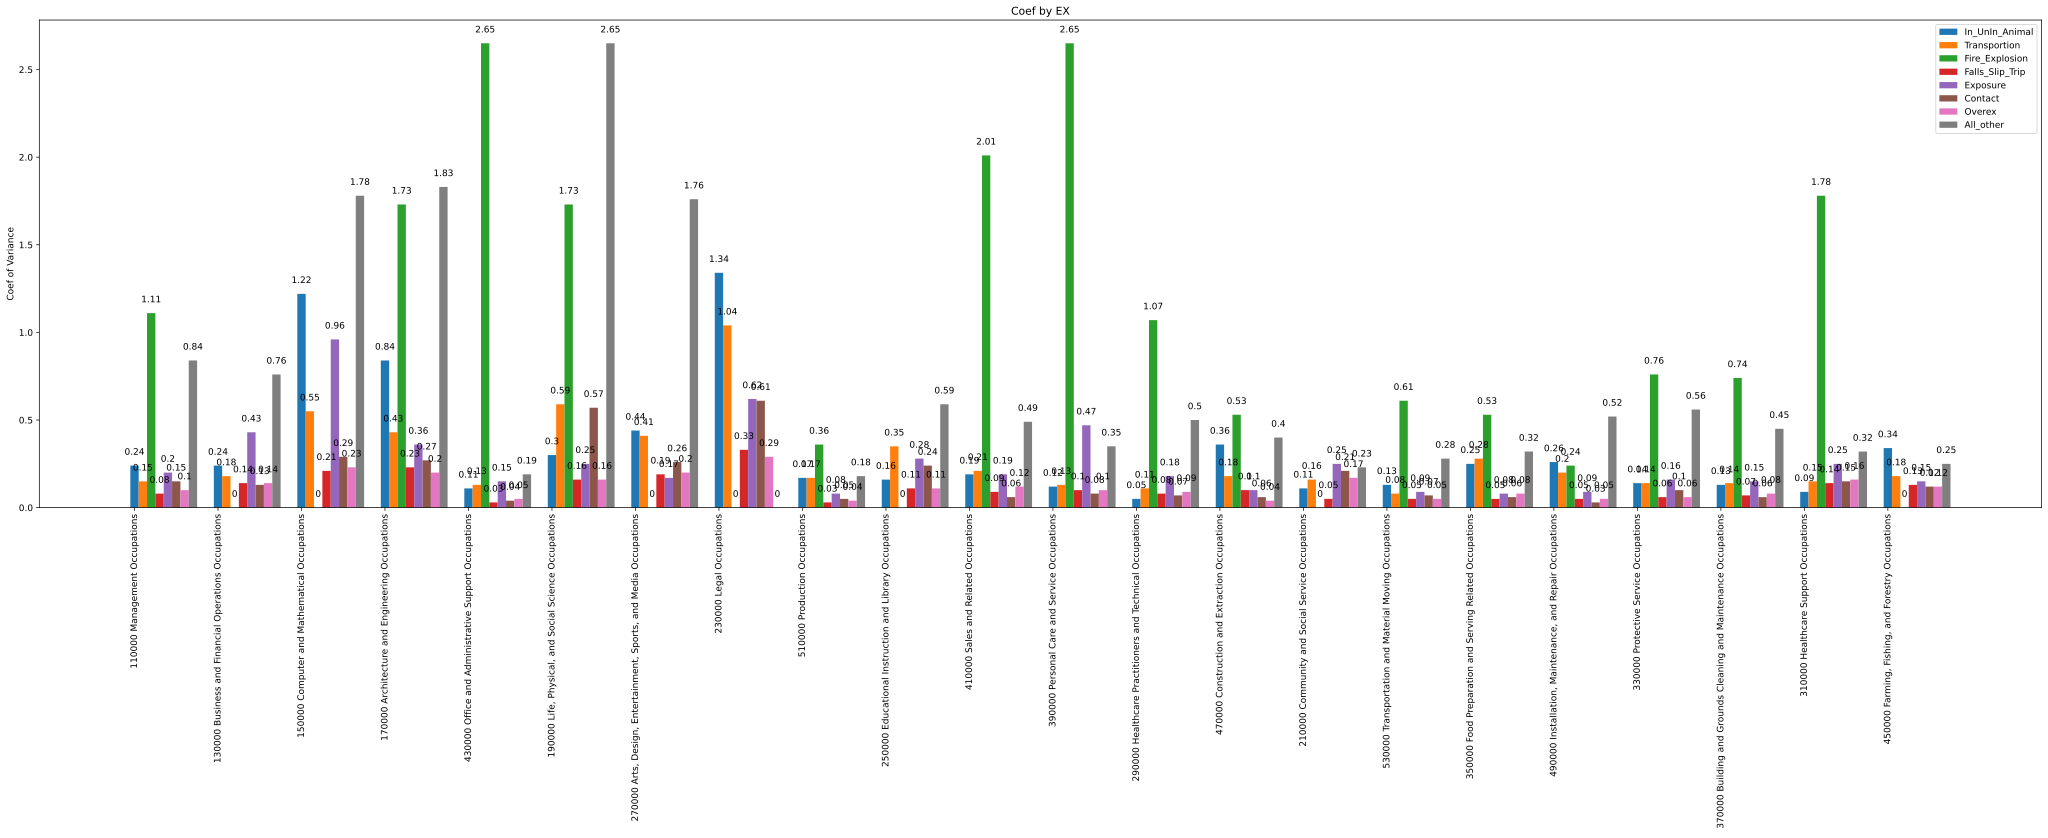

In [36]:
labels = []

for a in range(0,len(mult_array)):

    for i in range(0,len(mult_array[a][1])):
        line = mult_array[a][1][i]
        larr = str(line[0]).split(" ")
        lbl  = ""
        #print(larr)
        for j in range(0,len(larr[1:])):
            new_lbl = str(larr[1+j])
            lbl = lbl + " " + new_lbl
        #print(lbl)

        if lbl not in labels:
            labels.append(lbl)
        
#print(labels)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        val = round(val,2)
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(40, 10))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width/2), grpd[i], width/2, label=grpl[i])
    rects.append(tmp_rect)
    
    
# Add bar for relative population size
#total_ocup = np.array(total_male) + np.array(total_female)
#pop_scaled = np.array(grpd).max() / total_ocup[0:-1].max() * total_ocup
#i=i+1
#tmp_rect = ax.bar(x+i*(width/2), pop_scaled[0:-1], width/2, label='Population')
#rects.append(tmp_rect)


title = "Coef by EX"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coef of Variance')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 0.25)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()
    


# MEAN

In [37]:
cases = [ "In_UnIn_Animal", "Transportion", "Fire_Explosion", "Falls_Slip_Trip", "Exposure", "Contact", "Overex", "All_other"]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)

    mean_array = []

    #for i in range(0,len(code_list)):
    #for i in swivel_order:
    for i in sorted_order:
        
        use_case = str(soc_new_code[i+1][0][0:2]) + "0000" + " " + str(soc_new_code[i+1][1]) 
    
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
            
                year  = str(yr)
                case1 = global_y_soc1[j][0].split("-")[0][0:4]
                case2 = global_y_soc1[j][0].split("-")[0][-7:]
                case3 = global_y_soc1[j][0].split("-")[0][4:-7]
        
                if  (case1.find(year) >= 0) and (case2.find(ocup[-3:]) >=0) and (case3.find(ocup[0:-3]) >= 0):
                
                    #print(case1, case2, case3, ocup)
                
                    tmp =  global_y_soc1[j][0].split('-')
                    
                    #print(tmp)
                    #stop()
                    
                    use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    #use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
      
    
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        #ostd  = np.array(y).std()
        #ocov  = ostd/omean 
    
        if math.isnan(omean):
            ocov = 0.0
        
        omean_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        mean_array.append([str(omean_case),omean])
        
    mult_array.append([str(desired_case),mean_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(mean_array)):
        print("{0:1.7f} \t {1:} ".format(mean_array[i][1], str(mean_array[i][0]))) 

    print(" ")

['_In_UnIn_Animal_11', '_In_UnIn_Animal_13', '_In_UnIn_Animal_15', '_In_UnIn_Animal_17', '_In_UnIn_Animal_19', '_In_UnIn_Animal_21', '_In_UnIn_Animal_23', '_In_UnIn_Animal_25', '_In_UnIn_Animal_27', '_In_UnIn_Animal_29', '_In_UnIn_Animal_31', '_In_UnIn_Animal_33', '_In_UnIn_Animal_35', '_In_UnIn_Animal_37', '_In_UnIn_Animal_39', '_In_UnIn_Animal_41', '_In_UnIn_Animal_43', '_In_UnIn_Animal_45', '_In_UnIn_Animal_47', '_In_UnIn_Animal_49', '_In_UnIn_Animal_51', '_In_UnIn_Animal_53']
0.0000102 	 In_UnIn_Animal 110000 Management Occupations 
0.0000074 	 In_UnIn_Animal 130000 Business and Financial Operations Occupations 
0.0000048 	 In_UnIn_Animal 150000 Computer and Mathematical Occupations 
0.0000069 	 In_UnIn_Animal 170000 Architecture and Engineering Occupations 
0.0000064 	 In_UnIn_Animal 430000 Office and Administrative Support Occupations 
0.0000350 	 In_UnIn_Animal 190000 Life, Physical, and Social Science Occupations 
0.0000505 	 In_UnIn_Animal 270000 Arts, Design, Entertainment, S

In [38]:
labels = []

for a in range(0,len(mult_array)):

    for i in range(0,len(mult_array[a][1])):
        line = mult_array[a][1][i]
        larr = str(line[0]).split(" ")
        lbl  = ""
        #print(larr)
        for j in range(0,len(larr[1:])):
            new_lbl = str(larr[1+j])
            lbl = lbl + " " + new_lbl
        #print(lbl)

        if lbl not in labels:
            labels.append(lbl)
              
for i in range(0,len(labels)):
    print(labels[i])

 110000 Management Occupations
 130000 Business and Financial Operations Occupations
 150000 Computer and Mathematical Occupations
 170000 Architecture and Engineering Occupations
 430000 Office and Administrative Support Occupations
 190000 Life, Physical, and Social Science Occupations
 270000 Arts, Design, Entertainment, Sports, and Media Occupations
 230000 Legal Occupations
 510000 Production Occupations
 250000 Educational Instruction and Library Occupations
 410000 Sales and Related Occupations
 390000 Personal Care and Service Occupations
 290000 Healthcare Practitioners and Technical Occupations
 470000 Construction and Extraction Occupations
 210000 Community and Social Service Occupations
 530000 Transportation and Material Moving Occupations
 350000 Food Preparation and Serving Related Occupations
 490000 Installation, Maintenance, and Repair Occupations
 330000 Protective Service Occupations
 370000 Building and Grounds Cleaning and Maintenance Occupations
 310000 Healthca

8
22
../PLOTS/./NF_SUBAVG_EX/NF_E_2018_Mean_Injury_per_10000_by_EX.png


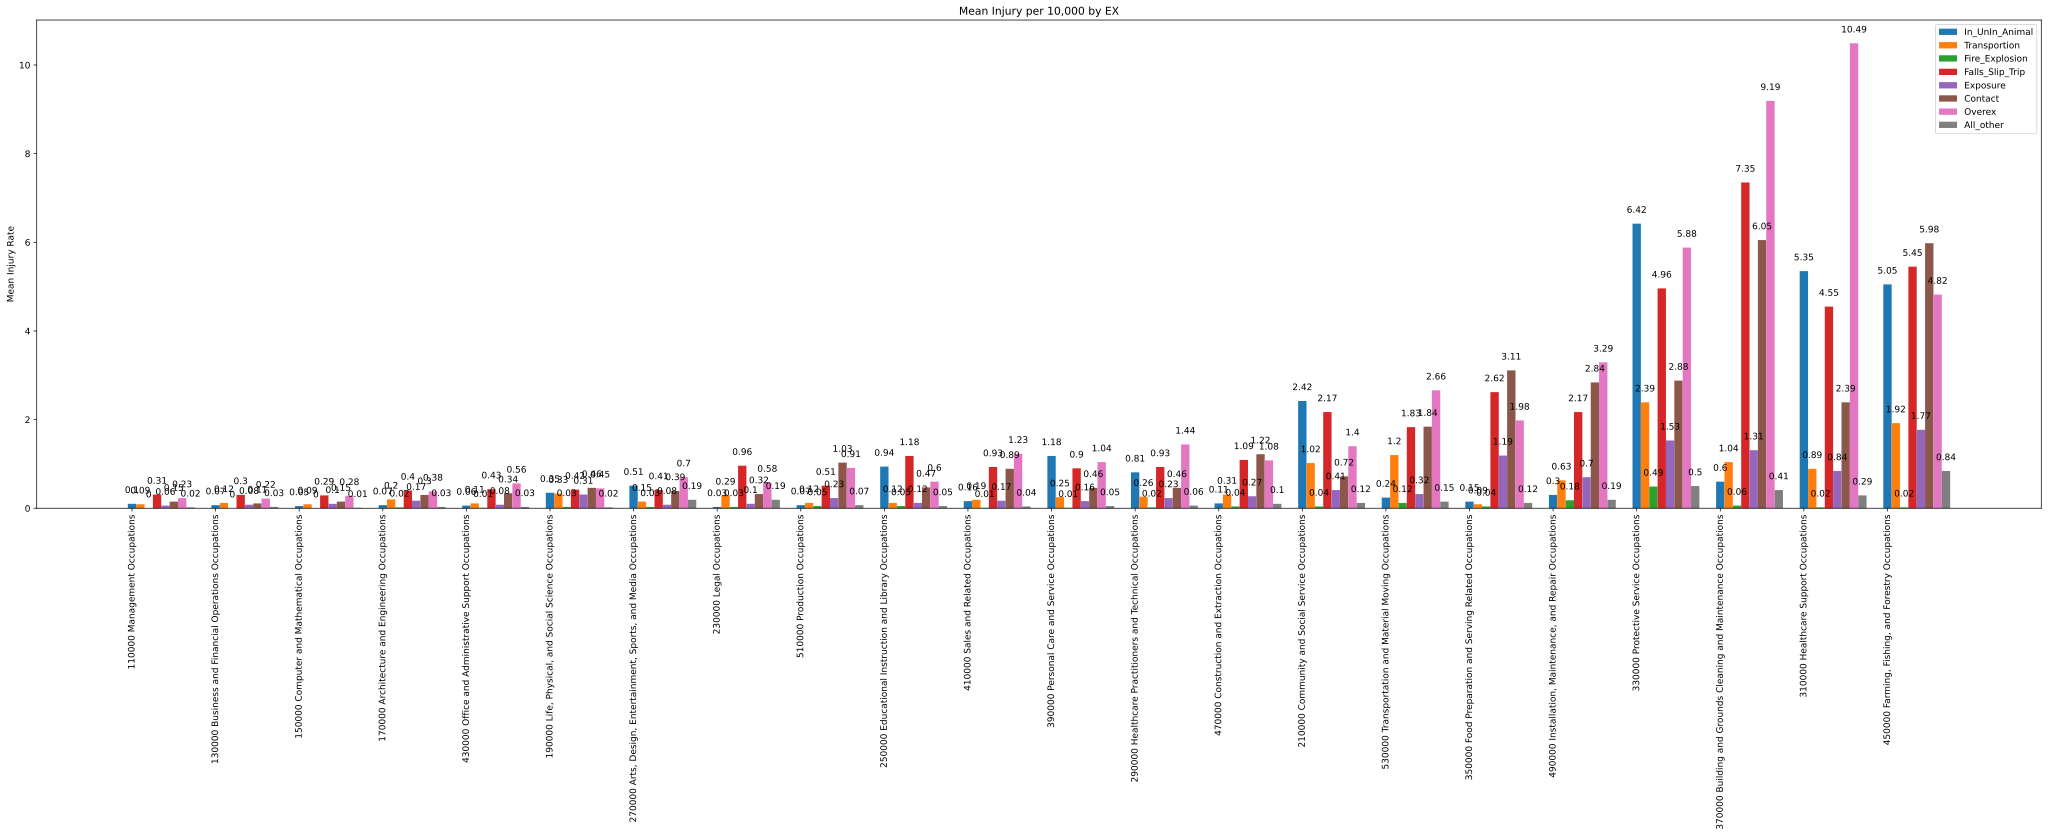

In [39]:
           
groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        
        val = round(10000*val,2)
        
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(40, 10))

print(len(grpd))
print(len(grpd[0]))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width/2), grpd[i], width/2, label=grpl[i])
    rects.append(tmp_rect)
    
    
# Add bar for relative population size
#total_ocup = np.array(total_male) + np.array(total_female)
#pop_scaled = np.array(grpd).max() / total_ocup[0:-1].max() * total_ocup
#i=i+1
#tmp_rect = ax.bar(x+i*(width/2), pop_scaled[0:-1], width/2, label='Population')
#rects.append(tmp_rect)

    
title = "Mean Injury per 10,000 by EX"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Injury Rate')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 100)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()